# Day 2: NYC High School Directory 

**Author:** Alexander Kuhn

**Date:** January 14, 2026

# This notebook shows:

1. Import Libraries
2. Load the Data
3. Clean column names
4. Select the required columns and evaluate the data quality
5. Filter schools located in Brooklyn
6. Number of unique schools in Brooklyn
7. Schools in Brooklyn that accept 9th-grade students
8. Grouping and aggregation by borough
9. Recommandation



## 1. Import Libraries

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

## 2. Load the Data

In [ ]:
df = pd.read_csv("day_2_datasets/high-school-directory.csv")
df.head()

,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,Council District,Census Tract,BIN,BBL,NTA,Zip Codes,Community Districts,Borough Boundaries,City Council Districts,Police Precincts
0,27Q260,Frederick Douglass Academy VI High School,Queens,Q465,718-471-2154,718-471-2890,9.0,12,NaN,NaN,...,31.0,100802.0,4300730.0,4.157360e+09,Far Rockaway-Bayswater ...,20529.0,51,3,47,59
1,21K559,Life Academy High School for Film and Music,Brooklyn,K400,718-333-7750,718-333-7775,9.0,12,NaN,NaN,...,47.0,306.0,3186454.0,3.068830e+09,Gravesend ...,17616.0,21,2,45,35
2,16K393,Frederick Douglass Academy IV Secondary School,Brooklyn,K026,718-574-2820,718-574-2821,9.0,12,NaN,NaN,...,36.0,291.0,3393805.0,3.016160e+09,Stuyvesant Heights ...,18181.0,69,2,49,52
3,08X305,Pablo Neruda Academy,Bronx,X450,718-824-1682,718-824-1663,9.0,12,NaN,NaN,...,18.0,16.0,2022205.0,2.036040e+09,Soundview-Castle Hill-Clason Point-Harding Par...,11611.0,58,5,31,26
4,03M485,Fiorello H. LaGuardia High School of Music & A...,Manhattan,M485,212-496-0700,212-724-5748,9.0,12,NaN,NaN,...,6.0,151.0,1030341.0,1.011560e+09,Lincoln Square ...,12420.0,20,4,19,12


## 3. Clean column names

- Make all column names lowercase
- Replace spaces with underscores
- Remove special characters

In [15]:
# Clean column names:
# - lowercase
# - replace spaces with underscores
# - remove special characters

df.columns = (df.columns.str.lower()
            .str.replace(" ", "_")
            .str.replace(r"[^\w_]", "", regex=True))

# Quick check
df.columns

Index(['dbn', 'school_name', 'borough', 'building_code', 'phone_number',
       'fax_number', 'grade_span_min', 'grade_span_max', 'expgrade_span_min',
       'expgrade_span_max', 'bus', 'subway', 'primary_address_line_1', 'city',
       'state_code', 'postcode', 'website', 'total_students', 'campus_name',
       'school_type', 'overview_paragraph', 'program_highlights',
       'language_classes', 'advancedplacement_courses', 'online_ap_courses',
       'online_language_courses', 'extracurricular_activities',
       'psal_sports_boys', 'psal_sports_girls', 'psal_sports_coed',
       'school_sports', 'partner_cbo', 'partner_hospital', 'partner_highered',
       'partner_cultural', 'partner_nonprofit', 'partner_corporate',
       'partner_financial', 'partner_other', 'addtl_info1', 'addtl_info2',
       'start_time', 'end_time', 'se_services', 'ell_programs',
       'school_accessibility_description', 'number_programs', 'priority01',
       'priority02', 'priority03', 'priority04', 'prior

## 4.Select the required columns and evaluate the data quality.

In [19]:
# Columns required for the analysis:
# - borough: geographic filtering and grouping
# - dbn: unique school identifier
# - grade_span_min / grade_span_max: grade eligibility
# - total_students: aggregation and averages

cols = ["borough", "dbn", "grade_span_min", "grade_span_max", "total_students"]
print("----- Number of missing values per column: -----")
print(f'\n{df[cols].isna().sum()}')


----- Number of missing values per column: -----

borough           0
dbn               0
grade_span_min    3
grade_span_max    0
total_students    9
dtype: int64


In [20]:
# Check for duplicate school identifiers

df["dbn"].duplicated().sum()

# Identify invalid grade ranges (min > max)

df[df["grade_span_min"] > df["grade_span_max"]][[
"dbn", "grade_span_min", "grade_span_max"
]]

,dbn,grade_span_min,grade_span_max


## 5.Filter schools located in Brooklyn

In [21]:
df_brooklyn = df[df["borough"].str.lower() == "brooklyn"]

## 6.Number of unique schools in Brooklyn

In [22]:
# Using the unique school identifier (dbn)

sum_schools_brooklyn_unique = df_brooklyn["dbn"].nunique()
print(f"Number of unique schools in Brooklyn: {sum_schools_brooklyn_unique}")

Number of unique schools in Brooklyn: 121


## 7.Schools in Brooklyn that accept 9th-grade students

In [23]:
print(f"----- Value counts for minimum grade entry: -----\n"
f"{df['grade_span_min'].value_counts()}")
print(f"\n----- Value counts for maximum grade entry: -----\n"
f"{df['grade_span_max'].value_counts()}")

----- Value counts for minimum grade entry: -----
grade_span_min
9.0    351
6.0     79
7.0      2
Name: count, dtype: int64

----- Value counts for maximum grade entry: -----
grade_span_max
12    404
11     19
10      9
9       3
Name: count, dtype: int64


In [25]:
# Remove rows with missing grade span information
brooklyn_grades = df_brooklyn.dropna(
    subset=["grade_span_min", "grade_span_max"])

schools_accepting_9th = brooklyn_grades[
    (brooklyn_grades["grade_span_min"] <= 9)
    & (brooklyn_grades["grade_span_max"] >= 9)]

num_schools_9th = schools_accepting_9th["dbn"].nunique()

print(
    f"Number of schools accepting 9th graders in Brooklyn: {num_schools_9th}")

Number of schools accepting 9th graders in Brooklyn: 121


## 8.Grouping and aggregation by borough

- Number of unique schools per borough with Visualiziation
- AVG Numbers of students per borough with Visualiziation
- Summary statistics for max grade span per borough
- Summary DataFrame per borough

## Visualization 1: Number of Schools per Borough


===== Number of Schools per Borough: =====


borough
Brooklyn         121
Bronx            118
Manhattan        106
Queens            80
Staten Island     10
Name: dbn, dtype: int64

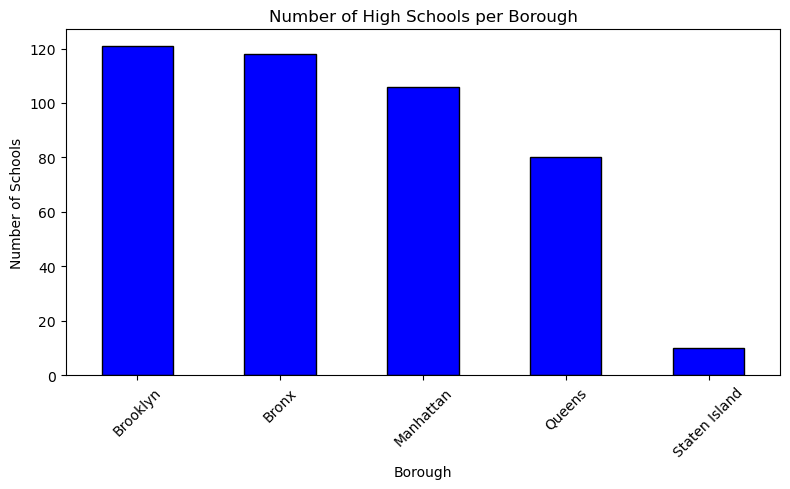

In [28]:
schools_per_borough = df.groupby('borough')['dbn'].nunique().sort_values(
ascending=False)
print("===== Number of Schools per Borough: =====")
display(schools_per_borough)
# -------------------------------
# Visualization 1: Number of Schools per Borough
# -------------------------------
plt.figure(figsize=(8, 5))
schools_per_borough.plot(kind="bar", color="blue", edgecolor="black")
plt.title("Number of High Schools per Borough")
plt.ylabel("Number of Schools")
plt.xlabel("Borough")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Visualization 2: Average Students per Borough

===== Average Number of Students per School by Borough: =====


borough
Bronx             490.4
Brooklyn          699.1
Manhattan         589.8
Queens           1046.6
Staten Island    1847.5
Name: total_students, dtype: float64

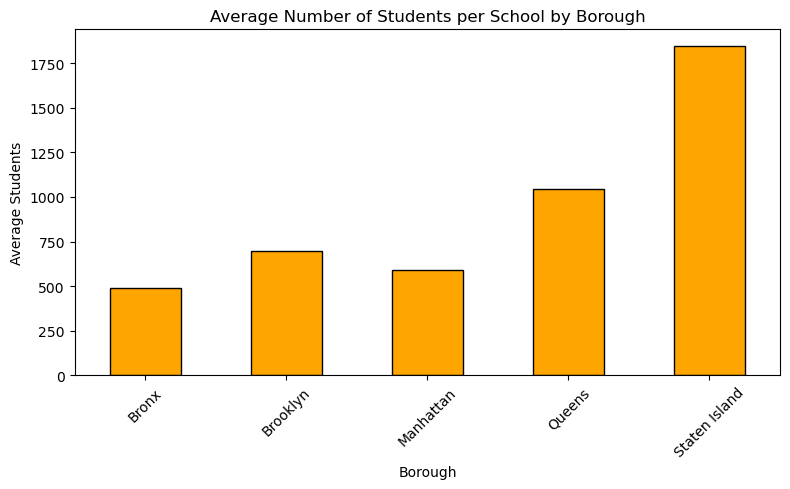

In [30]:
avg_students_per_borough = (
df.groupby("borough")
["total_students"] # NaN values in 'total_students' are ignored 
.mean().round(1))
print("===== Average Number of Students per School by Borough: =====")
display(avg_students_per_borough)
# -------------------------------
# Visualization: Average Students per Borough
# -------------------------------
plt.figure(figsize=(8, 5))
avg_students_per_borough.plot(kind="bar", color="orange", edgecolor="black")
plt.title("Average Number of Students per School by Borough")
plt.ylabel("Average Students")
plt.xlabel("Borough")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Summary statistics for maximum grade span per borough

In [31]:
grade_span_summary = (df.groupby("borough")["grade_span_max"].describe())
print("----- Grade Span Max Summary by Borough: -----")
display(grade_span_summary)

----- Grade Span Max Summary by Borough: -----


,count,mean,std,min,25%,50%,75%,max
borough,,,,,,,,
Bronx,118.0,11.906780,0.369506,9.0,12.0,12.0,12.0,12.0
Brooklyn,121.0,11.933884,0.381566,9.0,12.0,12.0,12.0,12.0
Manhattan,106.0,11.877358,0.472135,9.0,12.0,12.0,12.0,12.0
Queens,80.0,11.825000,0.497462,10.0,12.0,12.0,12.0,12.0
Staten Island,10.0,12.000000,0.000000,12.0,12.0,12.0,12.0,12.0


## Summary DataFrame per borough

In [33]:
summary_df = pd.DataFrame({
    "Number of Schools": df.groupby("borough")["dbn"].nunique(),
    "Average Students": df.groupby("borough")["total_students"].mean().round(2),
    "Grade Max Mean": df.groupby("borough")["grade_span_max"].mean().round(2),
    "Grade Min Mean": df.groupby("borough")["grade_span_min"].mean().round(2)
})

# Sort by number of schools for readability
summary_df = summary_df.sort_values("Number of Schools", ascending=False)
print("----- Summary of High Schools per Borough -----")
display(summary_df)
print("\n")

----- Summary of High Schools per Borough -----


,Number of Schools,Average Students,Grade Max Mean,Grade Min Mean
borough,,,,
Brooklyn,121,699.13,11.93,8.43
Bronx,118,490.41,11.91,8.42
Manhattan,106,589.83,11.88,8.48
Queens,80,1046.64,11.82,8.39
Staten Island,10,1847.50,12.00,9.00


# Recommandation

## Top findings

### Brooklyn leads in the number of schools:

Brooklyn has the most schools of any borough, with 121 high schools. Interestingly, 
all of them accept ninth graders. However, many schools start earlier (on average 
in grade 8.43) because they also offer middle school programs.

### All boroughs offer complete high school education:

Almost every school goes up to 12th grade, regardless of the borough. The average 
is between 11.82 and 12.00, which shows that students everywhere can complete 
high school.

### Combined middle and high school:

The average starting grade varies between boroughs: Staten Island 
usually starts at grade 9 (typical high school start), while Queens (8.39) 
and Brooklyn (8.43) often start earlier. This means that these schools have 
integrated middle school programs.

### There are major differences here:

- Staten Island: Only 10 schools, but really big (average of 1,848 students)
- Queens:        Also large schools (1,047 students per school)
- Brooklyn:      Medium-sized schools (699 students)
- Manhattan:     Similar to Brooklyn (590 students)
- Bronx:         Smaller schools (490 students)

### Fazit:

All boroughs offer complete high school education through grade 12. Staten Island 
has few but large schools – with fewer residents, central locations are more worthwhile .
Brooklyn and other densely populated boroughs have many smaller schools 
closer to the students. Each borough adapts the size and number of schools to its 
population structure.